# **Week 5: Cohort and Segment Analysis**

In [29]:
# Importing Libraries & Loading Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Indian_Kids_Screen_Time_Cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [30]:
# To Identify Top Cohorts

# 1. Age Band vs Device Category
cohort_age_device = (
    df.groupby(['Age_Band', 'Device_Category'])['Avg_Daily_Screen_Time_hr']
      .mean()
      .reset_index()
      .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)
print("Top 5 Age Band vs Device Category Cohorts by Average Screen Time:")
display(cohort_age_device.head(5))

Top 5 Age Band vs Device Category Cohorts by Average Screen Time:


,Age_Band,Device_Category,Avg_Daily_Screen_Time_hr
2,Pre-Teen,"Fixed TV (>30"" inch)",4.551061
4,Teenager,"Fixed TV (>30"" inch)",4.539986
3,Pre-Teen,"Portable (<30"" inch)",4.508054
5,Teenager,"Portable (<30"" inch)",4.507189
0,Child,"Fixed TV (>30"" inch)",3.932201


In [31]:
# 2. Gender vs Primary Device

cohort_gender_device = (
    df.groupby(['Gender', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']
      .mean()
      .reset_index()
      .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)

print("Top 5 Gender vs Primary Device Cohorts by Average Screen Time:")
display(cohort_gender_device.head(5))

Top 5 Gender vs Primary Device Cohorts by Average Screen Time:


,Gender,Primary_Device,Avg_Daily_Screen_Time_hr
0,Female,Laptop,4.481066
5,Male,Smartphone,4.442463
4,Male,Laptop,4.435549
1,Female,Smartphone,4.332350
6,Male,TV,4.291868


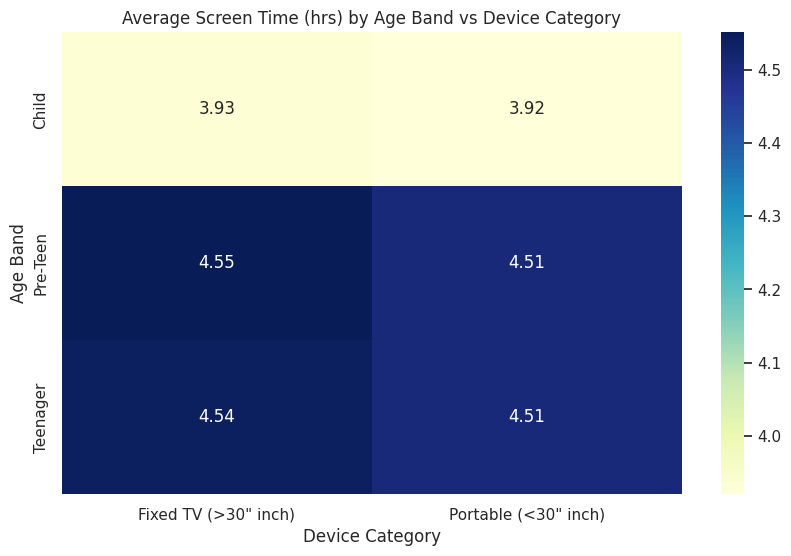

In [32]:
# Heatmap: Screen Time by Age Band vs Device Category
pivot_age_device = cohort_age_device.pivot(index='Age_Band', columns='Device_Category', values='Avg_Daily_Screen_Time_hr')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_age_device, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Screen Time (hrs) by Age Band vs Device Category")
plt.xlabel("Device Category")
plt.ylabel("Age Band")
plt.show()

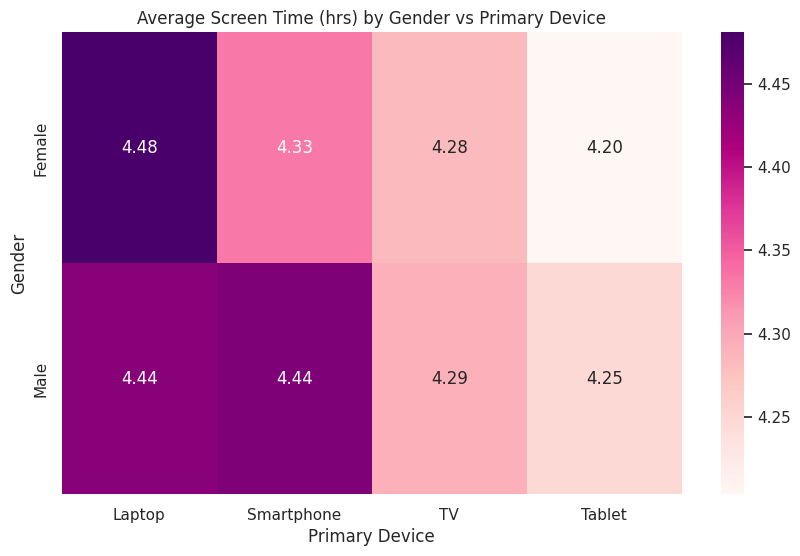

In [33]:
# Heatmap: Gender vs Primary Device
pivot_gender_device = cohort_gender_device.pivot(index='Gender', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_gender_device, annot=True, cmap='RdPu', fmt=".2f")
plt.title("Average Screen Time (hrs) by Gender vs Primary Device")
plt.xlabel("Primary Device")
plt.ylabel("Gender")
plt.show()

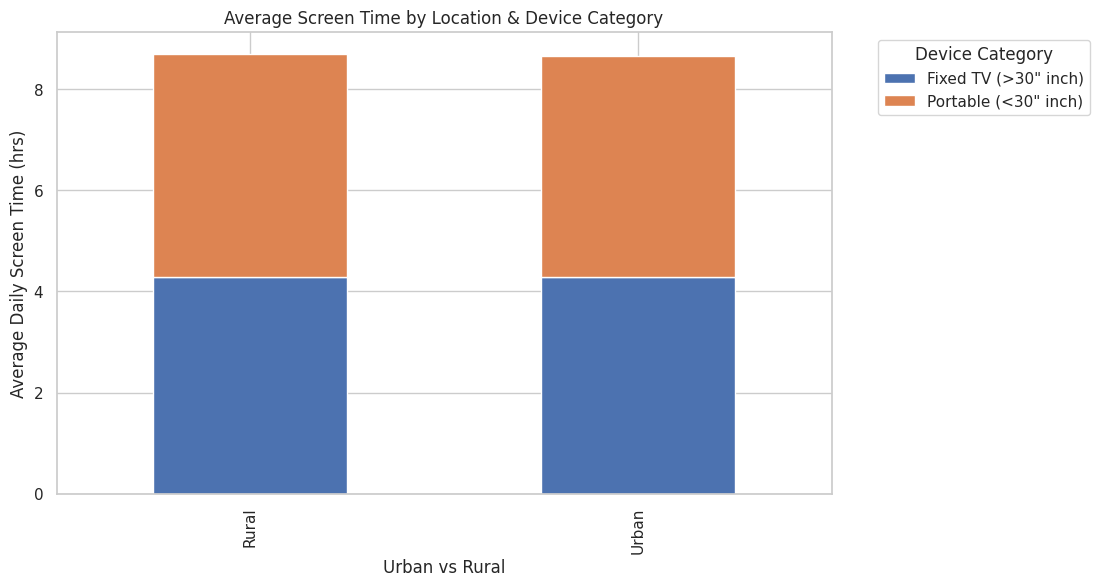

In [34]:
# Stacked Bar: Average Screen Time by Urban/Rural vs Device Category
urban_device = df.groupby(['Urban_or_Rural', 'Device_Category'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
urban_device.plot(kind='bar', stacked=True)
plt.title("Average Screen Time by Location & Device Category")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Urban vs Rural")
plt.legend(title="Device Category", bbox_to_anchor=(1.05, 1))
plt.show()

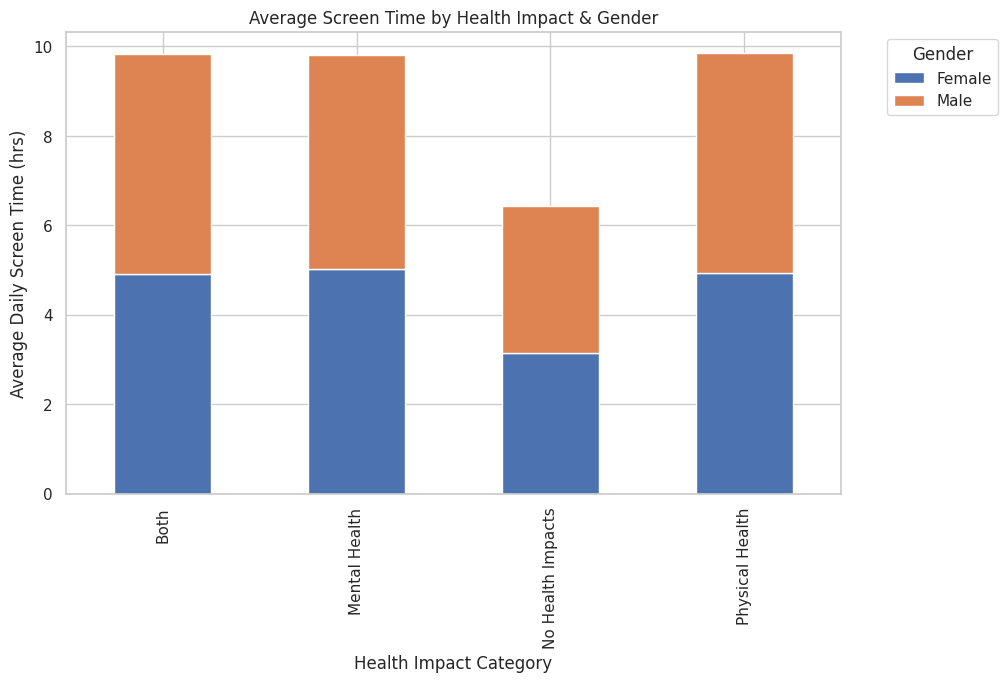

In [35]:
# Stacked Bar: Health Impact Category vs Gender
health_gender = df.groupby(['Health_Impact_Category', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
health_gender.plot(kind='bar', stacked=True)
plt.title("Average Screen Time by Health Impact & Gender")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Health Impact Category")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1))
plt.show()

# **Key Insights**
1. Top cohorts show which Age Bands and Device Categories lead to the highest average screen time.
2. Heatmaps highlight which groups (e.g., Teenagers on Portable Devices) have higher engagement.
3. Gender-based analysis may reveal distinct device preferences.
4. Urban kids may spend more time on portable or learning devices compared to rural kids.
5. Health impacts are more common among segments with higher screen time usage.